# ========================================
# ACM SUMMER SCHOOL - Quantum Computing
# ========================================

References: https://github.com/Qiskit/textbook

In [ ]:
!pip install -q qiskit  qiskit[visualization] qiskit-aer qiskit-ibm-runtime

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:


import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, circuit_drawer
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

print(f"✅ Qiskit version: {qiskit.__version__}")
print("🚀 Ready to go!")

✅ Qiskit version: 2.0.2
🚀 Ready to go!


# ========================================
# RECAP:  COMPLETE WORKFLOW
# ========================================


Create → Build → Measure → Run → Analyze

Task: Create a EPR pair and verify it!

In [ ]:

# Step 1: CREATE the circuit
print("Step 1: CREATE circuit")
qc = QuantumCircuit(2, name='EPR')
print(f"Created circuit: {qc.name} with {qc.num_qubits} qubits")
print()


Step 1: CREATE circuit
Created circuit: EPR with 2 qubits



In [ ]:

# Step 2: BUILD the quantum algorithm
print("Step 2: BUILD quantum gates")
qc.h(0)        # Superposition on first qubit
qc.cx(0, 1)    # Entangle qubit 0 with qubit 1

print("Gates added:")
print("• H(0): Create superposition")
print("• CNOT(0,1): Entangle qubits 0 and 1")
print("Result: |00⟩ + |11⟩ (EPR state)")
print()


Step 2: BUILD quantum gates
Gates added:
• H(0): Create superposition
• CNOT(0,1): Entangle qubits 0 and 1
Result: |00⟩ + |11⟩ (EPR state)



Step 3: ADD measurements
Circuit diagram:


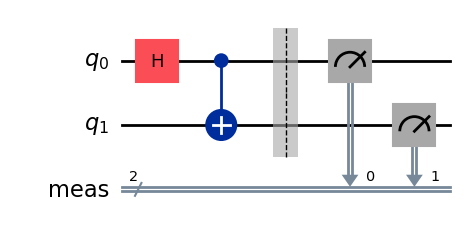

In [ ]:

# Step 3: ADD measurements
print("Step 3: ADD measurements")
qc.measure_all()
# Superdense Coding
print("Circuit diagram:")
display(qc.draw('mpl'))
print()


In [ ]:

# Step 4: RUN the experiment
print("Step 4: RUN experiment")
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=5000)
result = job.result()
counts = result.get_counts()

print(f"Raw results: {counts}")
print()


Step 4: RUN experiment
Raw results: {'11': 2495, '00': 2505}



Step 5: ANALYZE results
Expected outcomes (EPR state):
  |00⟩: 2505 ( 50.1%)
  |11⟩: 2495 ( 49.9%)


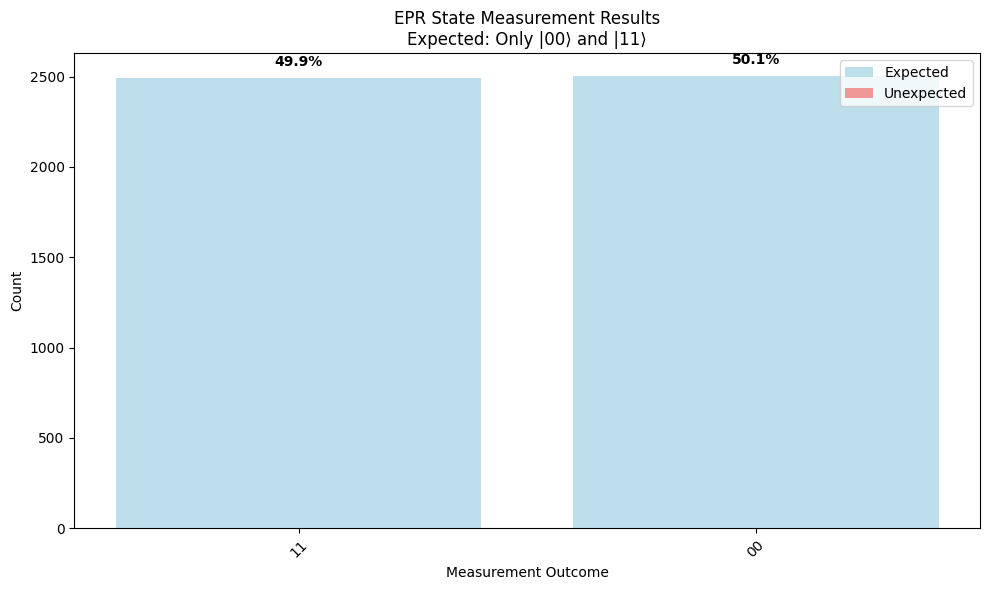


🎯 ANALYSIS SUMMARY:
• Total measurements: 5000
• Expected outcomes: 5000 (100.0%)
• Fidelity to ideal EPR state: 100.0%
✅ Excellent! Very close to ideal EPR state


In [ ]:

# Step 5: ANALYZE results
print("Step 5: ANALYZE results")

# Expected: only |00⟩ and |11⟩ should appear
expected_states = ['00', '11']
unexpected_states = [state for state in counts.keys() if state not in expected_states]

total_shots = sum(counts.values())

print("Expected outcomes (EPR state):")
for state in expected_states:
    count = counts.get(state, 0)
    percentage = count / total_shots * 100
    print(f"  |{state}⟩: {count:4d} ({percentage:5.1f}%)")

if unexpected_states:
    print("\nUnexpected outcomes (due to noise/simulation errors):")
    for state in unexpected_states:
        count = counts.get(state, 0)
        percentage = count / total_shots * 100
        print(f"  |{state}⟩: {count:4d} ({percentage:5.1f}%)")

# Visualize results
plt.figure(figsize=(10, 6))

# Color code: expected states in blue, unexpected in red
colors = ['lightblue' if state in expected_states else 'lightcoral'
          for state in counts.keys()]

bars = plt.bar(counts.keys(), counts.values(), color=colors, alpha=0.8)

# Add percentage labels
for bar, (state, count) in zip(bars, counts.items()):
    pct = count / total_shots * 100
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + total_shots*0.01,
            f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.title('EPR State Measurement Results\nExpected: Only |00⟩ and |11⟩')
plt.xlabel('Measurement Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add legend
expected_patch = plt.Rectangle((0,0),1,1, facecolor='lightblue', alpha=0.8, label='Expected')
unexpected_patch = plt.Rectangle((0,0),1,1, facecolor='lightcoral', alpha=0.8, label='Unexpected')
plt.legend(handles=[expected_patch, unexpected_patch])

plt.tight_layout()
plt.show()

# Calculate fidelity (how close to ideal EPR state)
expected_total = sum(counts.get(state, 0) for state in expected_states)
fidelity = expected_total / total_shots * 100

print(f"\n🎯 ANALYSIS SUMMARY:")
print(f"• Total measurements: {total_shots}")
print(f"• Expected outcomes: {expected_total} ({fidelity:.1f}%)")
print(f"• Fidelity to ideal EPR state: {fidelity:.1f}%")

if fidelity > 95:
    print("✅ Excellent! Very close to ideal EPR state")
elif fidelity > 85:
    print("✅ Good! Reasonably close to ideal EPR state")
else:
    print("⚠️  Moderate fidelity - might need noise mitigation")

# Exercise: Create and verify a GHZ State |000⟩ + |111⟩

# Superdense Coding

This notebook demonstrates the Superdense Coding (SDC) protocol. We will use Qiskit's simulator to test our quantum circuit.


## 1. The Difference between Superdense Coding and Quantum Teleportation <a id='difference'></a>

Quantum teleportation and superdense coding are closely related, to avoid confusion we need to clarify the difference.

Quantum teleportation is a process by which the state of qubit ($|\psi\rangle$) can be transmitted from one location to another, using two bits of classical communication and a Bell pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement. Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.

| Teleportation                                     | Superdense Coding                                    |
|:-------------------------------------------------:|:----------------------------------------------------:|
| Transmit one<br>qubit using two<br>classical bits | Transmit two<br>classical bits<br>using one<br>qubit |


The teleportation protocol can be thought of as a flipped version of the superdense coding protocol, in the sense that Alice and Bob merely “swap their equipment.”



## 2. The Process <a id='process'></a>

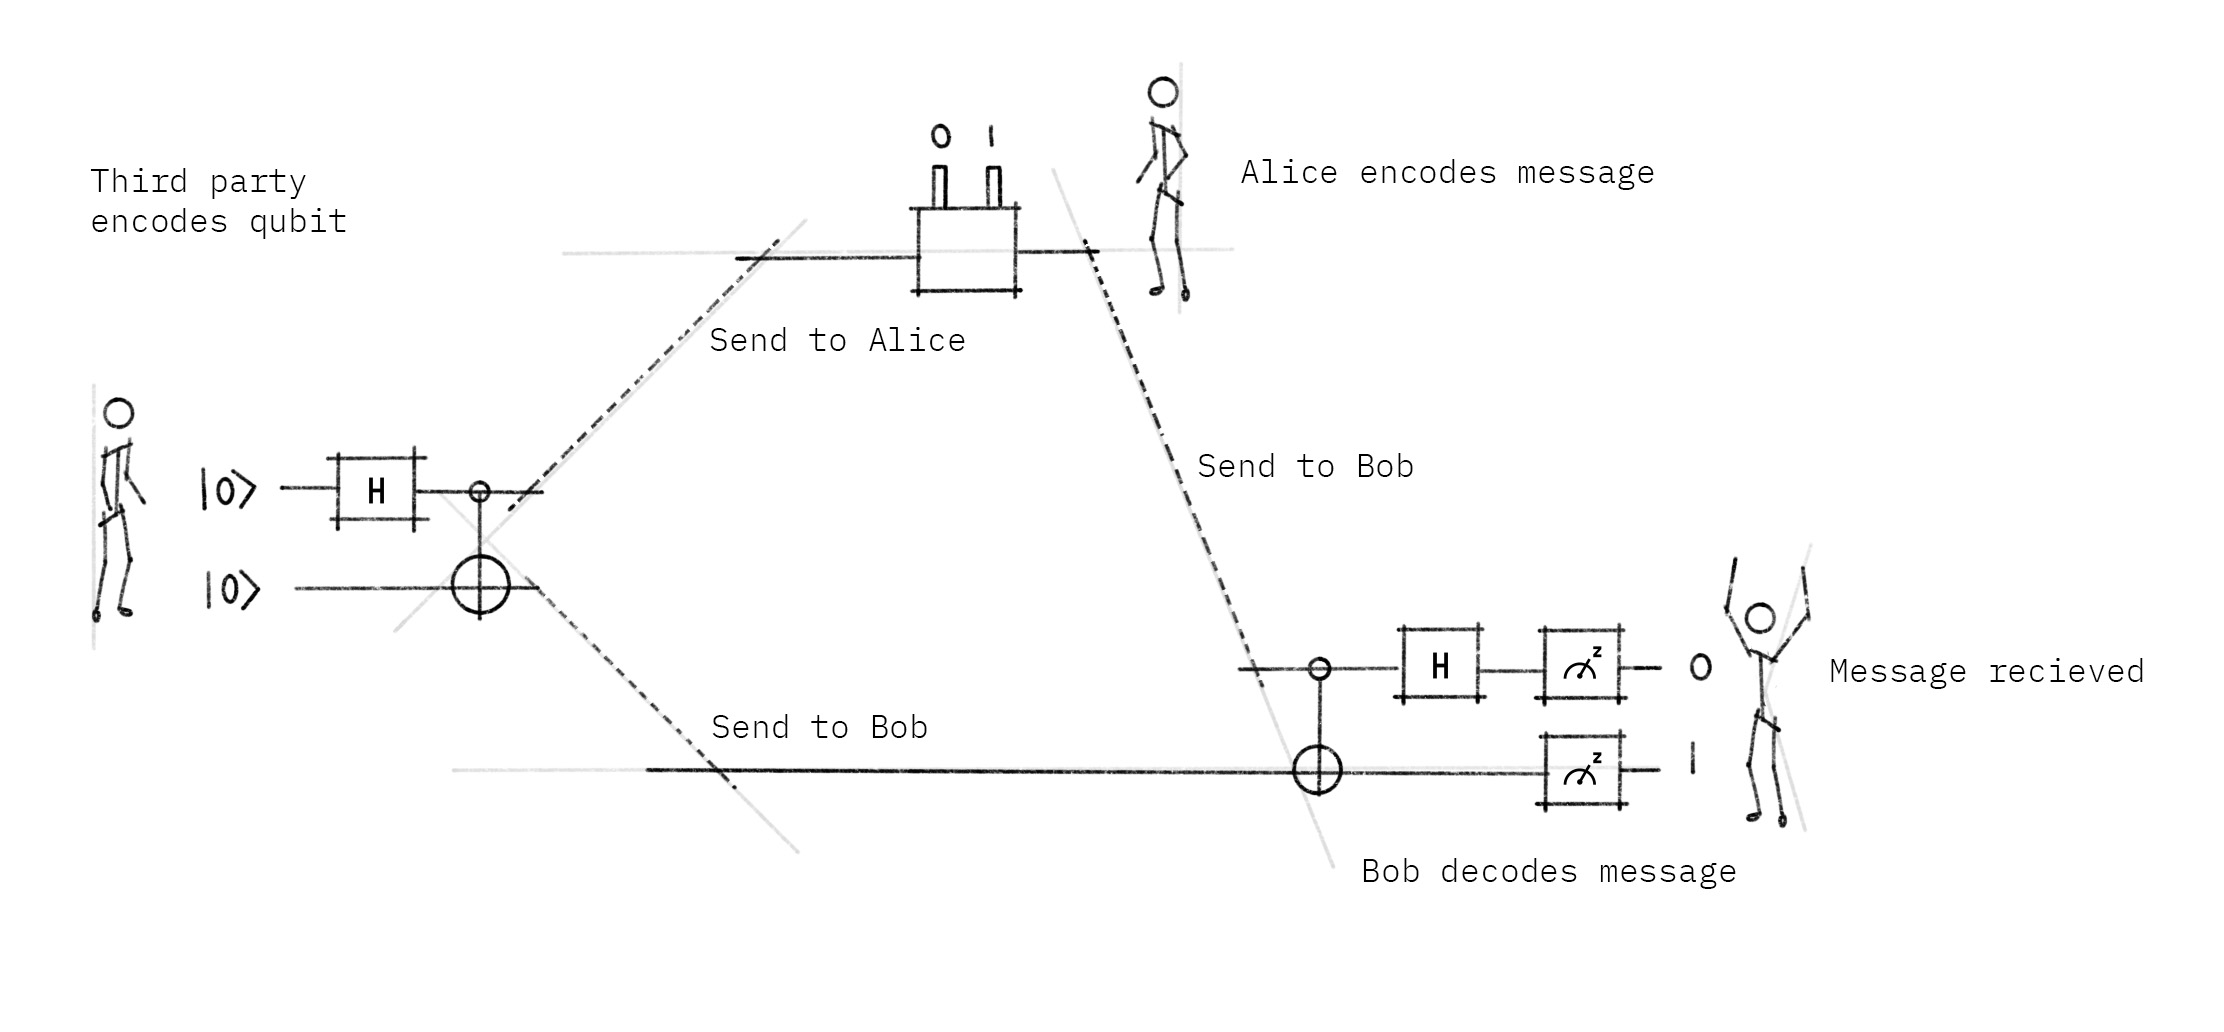

### 2.1 Step 1 <a id='step1'></a>
The process starts with Alice and Bob meeting at a Summer School. Two qubits are prepared by them in an entangled state. They initially starts the 2 qubits in the basis state $|0\rangle$. They then apply Hadamard gate ($H$) to the first qubit to create superposition. They then applies CNOT gate ($CX$) using the first qubit as a control and the second as the target. This is the entangled state (Bell pair) we mentioned earlier.

#### Outcome States

We start in the state:

$$|00\rangle = |0\rangle_A\otimes |0\rangle_B$$

where the qubit to be sent to Alice is labeled with $A$ and the qubit to be sent to Bob is labeled $B$. Alice first applies a Hadamard gate to the first qubit, which creates superposition and we get the state:


$$|+0\rangle  =  \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$$



Then Alice applies the CNOT gate. The CNOT gate entangles both qubits, i.e. it flips the target if the control is $|1\rangle$. Note that the control qubit is our leftmost qubit.



$$\text{CNOT} \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle) = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$



### 2.2 Step 2 <a id='step2'></a>

 The first qubit goes with Alice and the second qubit goes with Bob. The goal of the protocol is for Alice to send 2 classical bits of information to Bob using her qubit. But before she does, she needs to apply a set of quantum gates to her qubit depending on the 2 bits of information she wants to send:


#### Encoding Rules for Superdense Coding (Alice protocol):
<table>
    <tr>
        <th>Intended Message</th>
        <th>Applied Gate</th>
        <th>Resulting State ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
    </tr>
    <tr>
        <td>00</td>
        <td>$I$</td>
        <td>$|00\rangle + |11\rangle$</td>
    </tr>
    <tr>
        <td>01</td>
        <td>$X$</td>
        <td>$|10\rangle + |01\rangle$</td>
    </tr>
    <tr>
        <td>10</td>
        <td>$Z$</td>
        <td>$|00\rangle - |11\rangle$</td>
    </tr>
    <tr>
        <td>11</td>
        <td>$ZX$</td>
        <td>$-|10\rangle + |01\rangle$</td>
    </tr>
</table>

Thus if she wants to send a `00`, she does nothing to her qubit (apply the identity ($I$) gate). If she wants to send a `01`, then she applies the $X$ gate. Depending on what she wants to send, she applies the appropriate gate, then sends her qubit to Bob for the final step in the process.


### 2.3 Step 3 <a id='step3'></a>

Bob receives Alice's qubit (leftmost qubit) and uses his qubit to decode Alice's message. Notice that he does not need to have knowledge of the state in order to decode it — he simply uses the restoration operation.

Bob applies a CNOT gate using the leftmost qubit as control and the rightmost as target. Then he applies a Hadamard gate and finally performs a measurement on both qubits to extract Alice's message.

<table>
    <tr>
        <th>Bob Receives ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>After CNOT-gate ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>After H-gate</th>
    </tr>
    <tr>
        <td>$|00\rangle + |11\rangle$</td>
        <td>$|00\rangle + |10\rangle$</td>
        <td>$|00\rangle$</td>
    </tr>
    <tr>
        <td>$|10\rangle + |01\rangle$</td>
        <td>$|11\rangle + |01\rangle$</td>
        <td>$|01\rangle$</td>
    </tr>
    <tr>
        <td>$|00\rangle - |11\rangle$</td>
        <td>$|00\rangle - |10\rangle$</td>
        <td>$|10\rangle$</td>
    </tr>
    <tr>
        <td>$-|10\rangle + |01\rangle$</td>
        <td>$-|11\rangle + |01\rangle$</td>
        <td>$|11\rangle$</td>
    </tr>
</table>

## 3. Simulating the Superdense Coding Protocol <a id='simulating'></a>

We saw that to create an entangled pair, we needed to do a H-gate followed by a CNOT. Let's create a function that takes a `QuantumCircuit` and entangles the qubits with indices `a` and `b`:

In [ ]:
def create_bell_pair():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

Next we need to encode our message. We saw that there were four possible messages we could send: `00`, `10`, `01` or `11`. Let's create a function that takes this message and applies the appropriate gates for us:

In [ ]:
def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

Finally, we need to decode our message, we saw we could do this using a CNOT followed by a H-gate. Let's create a function that does this for us too:

In [ ]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

Finally, we can put this together to complete our protocol.

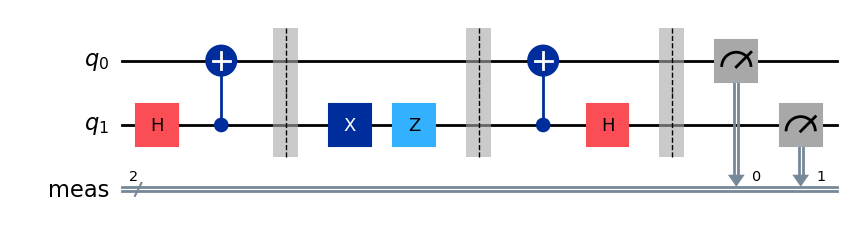

In [ ]:
# At the summer school, Alice and Bob create the entangled pair
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '11'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
display(qc.draw('mpl'))

### 3.1 Visualizing Our Measurements <a id='visualising'></a>

{'11': 1000}


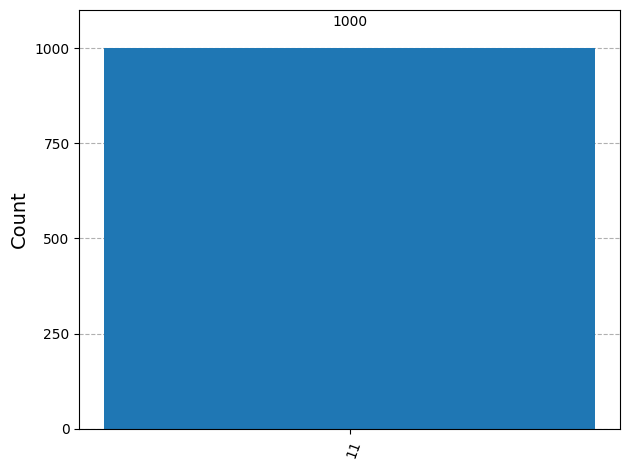

In [ ]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Our simulator simulates a perfect quantum computer. We can see that, without errors, we get a 100% chance of measuring the correct message.


# Deutsch-Jozsa Algorithm

In this section, we first introduce the Deutsch-Jozsa problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit, and run it on a simulator and device.

# Introduction

The Deutsch-Jozsa algorithm, first introduced in [David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167), was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.

## Deutsch-Jozsa Problem

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

Screenshot 2023-07-26 at 13-40-10 Deutsch-Jozsa Algorithm.png

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.

Note that the Deutsch-Jozsa problem is an $n$-bit extension of the single bit Deutsch problem.

## The Classical Solution

Classically, in the best case, two queries to the oracle can determine if the hidden Boolean function, $f(x)$ , is balanced: e.g. if we get both $f(0,0,0,....) → 0$ and $f(1,0,0,...) → 1$, then we know the function is balanced as we have obtained the two different outputs.

In the worst case, if we continue to see the same output for each input we try, we will have to check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is
$2^n$, this implies that we need $2^{n-1}+1$ trial inputs to be certain that $f(x)$ is constant in the worst case. For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, getting all $0$'s, it is still possible that the $9$th input returns a $1$ and $f(x)$ is balanced. Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:


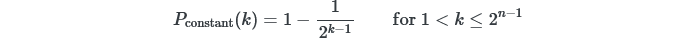

Realistically, we could opt to truncate our classical algorithm early, say if we were over x% confident. But if we want to be 100% confident, we would need to check $2^{n-1}+1$ inputs.

##  Quantum Solution

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $|x⟩|y⟩$ to $|x⟩|y \
\oplus f(x)⟩$, where $\oplus$ is addition modulo $2$. Below is the generic circuit for the Deutsch-Jozsa algorithm.

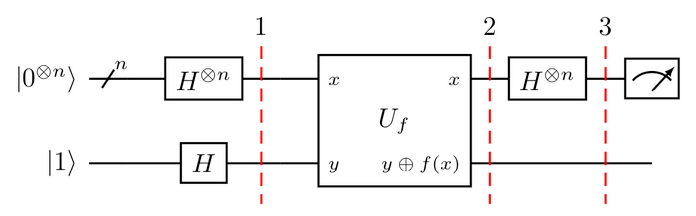

Now, let's go through the steps of the algorithm:

1. Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0⟩$, and the second is a one-qubit register initialized to $|1⟩$:

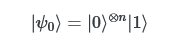

2. Apply a Hadamard gate to each qubit:

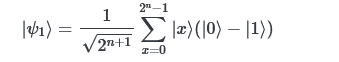

3. Apply the quantum oracle $|x⟩|y⟩$ to $|x⟩|y⊕f(x)⟩$:


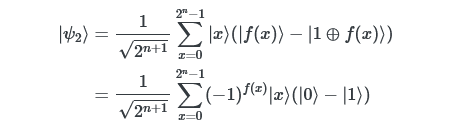

since for each $x,f(x)$ is either $0$ or $1$.

4. At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:


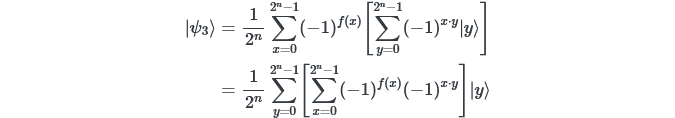

where $x⋅y = x_0 y_0 \oplus x_1 y_1 \oplus ... \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.

5. Measure the first register. Notice that the probability of measuring
Screenshot 2023-07-26 at 13-53-49 Deutsch-Jozsa Algorithm.png
, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced.

# Creating Quantum Oracles

Let's see some different ways we can create a quantum oracle.

For a constant function, it is simple:

    if f(x) = 0, then apply the I gate to the qubit in register 2.
    if f(x) = 1, then apply the X gate to the qubit in register 2.

For a balanced function, there are many different circuits we can create. One of the ways we can guarantee our circuit is balanced is by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:

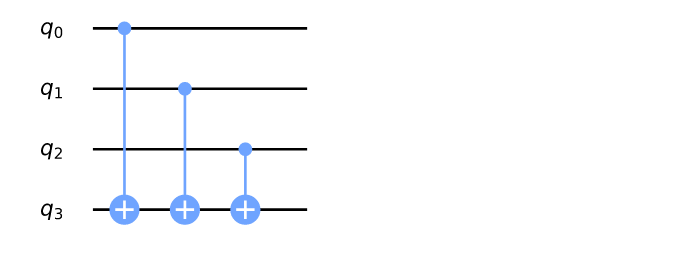

In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which input states give which output in the table below:

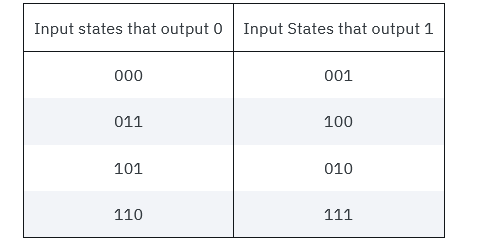

We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:

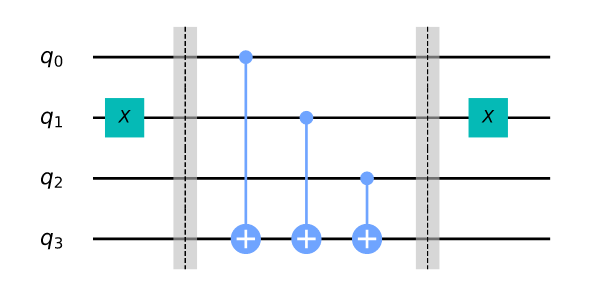

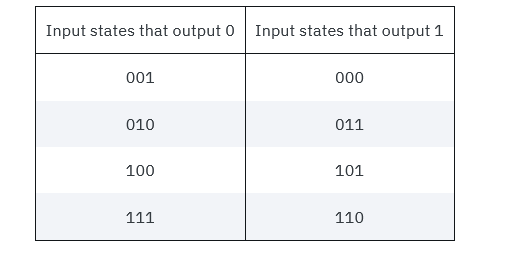

Next, we set the size of the input register for our oracle:

In [ ]:
# set the length of the n-bit input string.
n = 3

## Constant Oracle

Let's start by creating a constant oracle, in this case the input has no effect on the output so we just randomly set the output qubit to be 0 or 1:

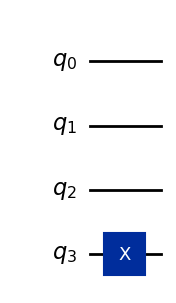

In [ ]:
# set the length of the n-bit input string.
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

### Balanced Oracle



In [ ]:
balanced_oracle = QuantumCircuit(n+1)

Next, we create a balanced oracle. As we saw in section 1b, we can create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. We can vary the input states that give 0 or 1 by wrapping some of the controls in X-gates. Let's first choose a binary string of length n that dictates which controls to wrap:

In [ ]:
b_str = "101"

Now we have this string, we can use it as a key to place our X-gates. For each qubit in our circuit, we place an X-gate if the corresponding digit in b_str is 1, or do nothing if the digit is 0.

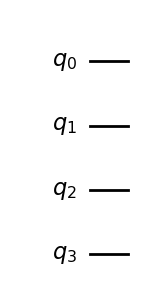

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "000"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw('mpl')

Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:

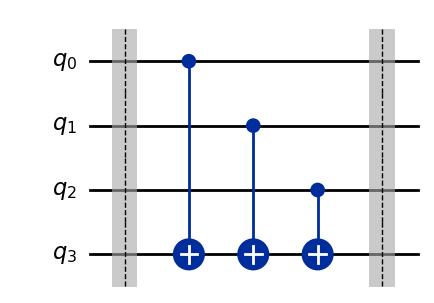

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "000"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

Finally, we repeat the code from two cells up to finish wrapping the controls in X-gates:

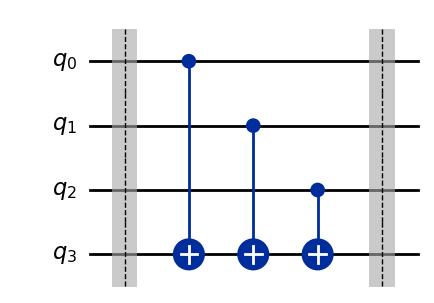

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "000"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

We have just created a balanced oracle! All that's left to do is see if the Deutsch-Jozsa algorithm can solve it.

# The Full Algorithm

Let's now put everything together. This first step in the algorithm is to initialize the input qubits in the state $|+⟩$ and the output qubit in the state $|-⟩$

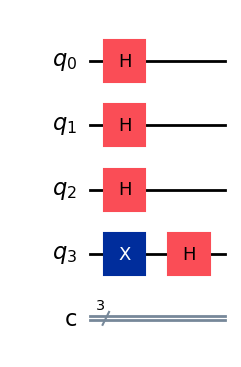

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

Next, let's apply the oracle. Here we apply the balanced_oracle we created above:

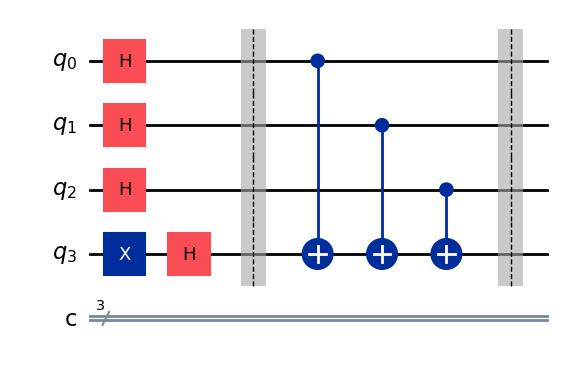

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw('mpl')

Finally, we perform H-gates on the $n$-input qubits, and measure our input register:

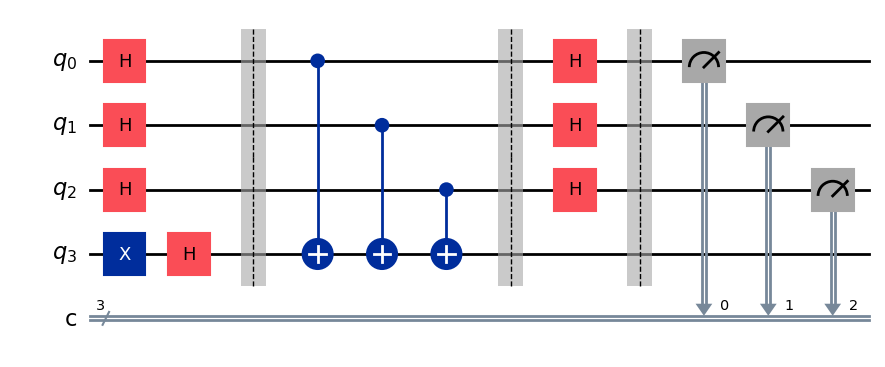

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

Let's see the output:

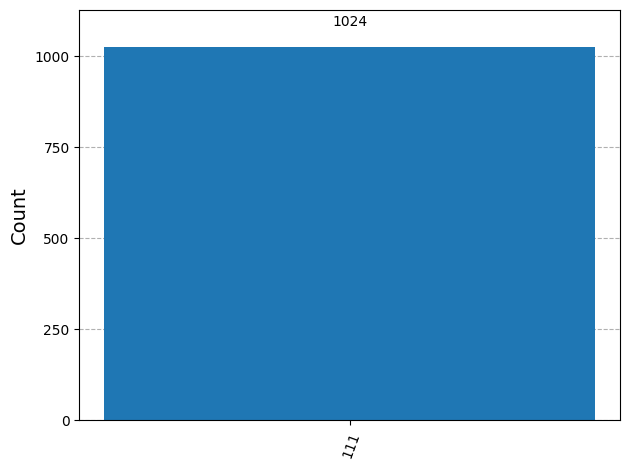

In [ ]:
# use local simulator


from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import Session
from qiskit_aer import AerSimulator

# Run the sampler job locally using Aer Simulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(dj_circuit)
with Session(backend=aer_sim) as session:
    sampler = Sampler(mode=session)
    result = sampler.run([isa_qc]).result()


plot_histogram(result[0].data.c.get_counts())


We can see from the results above that we have a 0% chance of measuring 000. This correctly predicts the function is balanced.

### Generalised Circuits

Below, we provide a generalised function that creates Deutsch-Jozsa oracles and turns them into quantum gates. It takes the case, (either 'balanced' or 'constant', and n, the size of the input register:

In [ ]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Let's also create a function that takes this oracle gate and performs the Deutsch-Jozsa algorithm on it:

In [ ]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)

    for i in range(n):
        dj_circuit.measure(i, i)

    return dj_circuit

Finally, let's use these functions to play around with the algorithm:

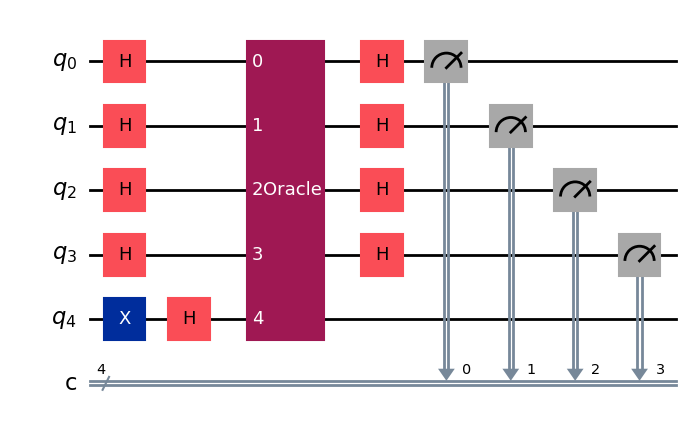

In [ ]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

And see the results of running this circuit:

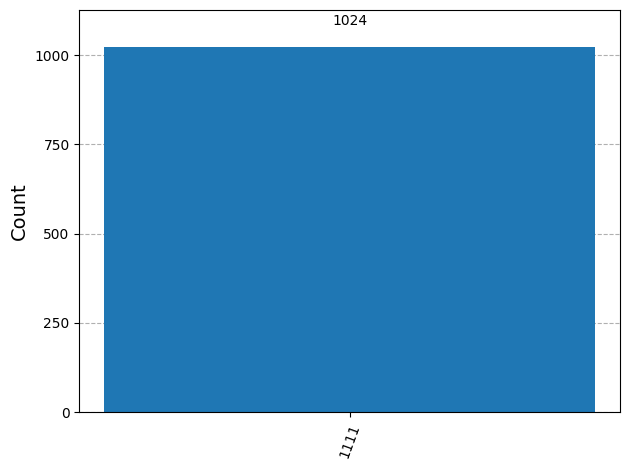

In [ ]:
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(dj_circuit)
with Session(backend=aer_sim) as session:
    sampler = Sampler(mode=session)
    result = sampler.run([isa_qc]).result()


plot_histogram(result[0].data.c.get_counts())

# Experiment with Real Devices

We can run the circuit on the real device as shown below. We first look for the least-busy device that can handle our circuit.

In [ ]:

from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import Session
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

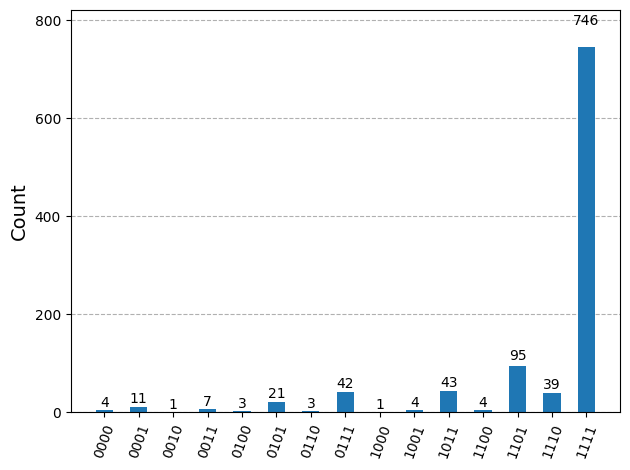

In [ ]:
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(dj_circuit)

# You can use a fixed seed to get fixed results.
options = {"simulator": {"seed_simulator": 42}}
sampler = Sampler(mode=fake_manila, options=options)

result = sampler.run([isa_qc]).result()
plot_histogram(result[0].data.c.get_counts())

As we can see, the most likely result is 1111. The other results are due to errors in the quantum computation

# Noise Model in Aer Simulator

Courtesy: Prof. Subhajit Roy

In [ ]:
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

# Step 4: RUN the experiment
print("Step 4: RUN experiment")

# Define a simple noise model with depolarizing errors
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

# Add noise to the simulator

simulator = AerSimulator(noise_model=noise_bit_flip)
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=5000)
result = job.result()
counts = result.get_counts()

counts_bit_flip = result.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)

print(f"Raw results: {counts}")
print()

Step 4: RUN experiment
Raw results: {'01': 572, '00': 157, '10': 1038, '11': 3233}

